In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Ruta del archivo .dta original
input_file_path = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Bases/usu_individual_T104.dta'

# Leer el archivo .dta original
df_04 = pd.read_stata(input_file_path)

# Filtrar las filas donde 'REGION' es igual a "Gran Buenos Aires"
df_04_filtrado = df_04[df_04['region'] == "Gran Buenos Aires"].copy()

# --- CONVERTIR NOMBRES DE COLUMNAS A MAYÚSCULAS ---
df_04_filtrado.columns = [col.upper() for col in df_04_filtrado.columns]

for col in df_04_filtrado.select_dtypes(include='category').columns:
    df_04_filtrado[col] = df_04_filtrado[col].cat.rename_categories(lambda x: str(x))

# Ruta para guardar el nuevo archivo .dta filtrado
output_file_path = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Bases/usu_individual_T104_filtrado.dta'

# Guardar el DataFrame filtrado en un nuevo archivo .dta
df_04_filtrado.to_stata(output_file_path)

# Confirmar que se guardó correctamente
print(f"Archivo guardado en: {output_file_path}")

Archivo guardado en: C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Bases/usu_individual_T104_filtrado.dta


In [2]:
# Ruta del archivo Excel
file_path_24 = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Bases/usu_individual_T124.xlsx'

# Leer el archivo Excel
df_24 = pd.read_excel(file_path_24)

# Filtrar las filas donde 'REGION' es igual a 1
df_24_filtrado = df_24[df_24['REGION'] == 1]

# Guardar el DataFrame filtrado en un nuevo archivo Excel
output_path = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Bases/usu_individual_T124_filtrado.xlsx'
df_24_filtrado.to_excel(output_path, index=False)
print(f"Archivo guardado en: {output_path}")

Archivo guardado en: C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Bases/usu_individual_T124_filtrado.xlsx


In [3]:
input_file_path_04_filt = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Bases/usu_individual_T104_filtrado.dta'
try:
    df_04 = pd.read_stata(input_file_path_04_filt)
    print(f"DataFrame df_04 cargado exitosamente desde: {input_file_path_04_filt}")
    print(f"Filas de df_04: {df_04.shape[0]}, Columnas de df_04: {df_04.shape[1]}")
except FileNotFoundError:
    print(f"Error: Archivo no encontrado para df_04: {input_file_path_04_filt}")
    exit()
except Exception as e:
    print(f"Error al cargar df_04 desde {input_file_path_04_filt}: {e}")
    exit()


DataFrame df_04 cargado exitosamente desde: C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Bases/usu_individual_T104_filtrado.dta
Filas de df_04: 7647, Columnas de df_04: 177


In [4]:
input_file_path_24_filt = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Bases/usu_individual_T124_filtrado.xlsx'
try:
    df_24 = pd.read_excel(input_file_path_24_filt)
    print(f"DataFrame df_24 cargado exitosamente desde: {input_file_path_24_filt}")
    print(f"Filas de df_24: {df_24.shape[0]}, Columnas de df_24: {df_24.shape[1]}")
except FileNotFoundError:
    print(f"Error: Archivo no encontrado para df_24: {input_file_path_24_filt}")
    exit()
except Exception as e:
    print(f"Error al cargar df_24 desde {input_file_path_24_filt}: {e}")
    exit()

DataFrame df_24 cargado exitosamente desde: C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Bases/usu_individual_T124_filtrado.xlsx
Filas de df_24: 7051, Columnas de df_24: 177


In [5]:
# IMPORTANTE: Este script asume que las librerías pandas, numpy, re
# ya están importadas si se ejecuta en un entorno como Jupyter/IPython
# donde los imports de celdas anteriores persisten.
# Si se ejecuta como un script independiente, asegúrate de que los imports
# necesarios (pandas, numpy, re) estén al principio.

import pandas as pd
import numpy as np
import re

# --- Configuración ---
# <<< RUTA DEL ARCHIVO EXCEL DE MAPEO >>>
excel_file_path = r"C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Bases/GlosarioCompleto.xlsx"

# Variables explícitamente excluidas de la conversión categórica por el usuario
variables_excluidas_usuario = ['TRIMESTRE', 'REGION', 'MAS_500', 'AGLOMERADO']

# Palabras clave en las notas que indican que la variable es NO categórica mapeable
non_categorical_keywords = [
    'Variable Identificadora', 'Valor Numérico', 'Variable Numérica',
    'Valor Código', 'Variable de Código', 'Variable de Texto Libre',
    'No tiene valores categóricos mapeables'
]

# --- Cargar el mapeo desde Excel ---
try:
    df_mapping = pd.read_excel(excel_file_path)
    df_mapping.columns = df_mapping.columns.str.strip()
    df_mapping = df_mapping.rename(columns={
        'Valor': 'Valor',
        'Valor Numérico 2004': 'Valor',
        'Descripción 2004': 'Descripción 2004',
        'Categoría (Texto) 2024': 'Descripción 2024',
        'Notas / Aclaraciones': 'Notas / Aclaraciones'
    })
    required_cols_for_map = ['Variable', 'Valor', 'Descripción 2004', 'Descripción 2024', 'Notas / Aclaraciones']
    if not all(col in df_mapping.columns for col in required_cols_for_map):
        missing = [col for col in required_cols_for_map if col not in df_mapping.columns]
        raise ValueError(f"El archivo Excel debe contener las columnas necesarias: {required_cols_for_map}. Faltan: {missing}.")

except FileNotFoundError:
    print(f"Error: Archivo de mapeo no encontrado: {excel_file_path}")
    exit()
except Exception as e:
    print(f"Error al leer o procesar el archivo Excel de mapeo: {e}")
    exit()

# --- Identificar variables candidatas para mapeo categórico basado en notas ---
candidate_vars_for_mapping = set()
variables_excluidas_final = set(variables_excluidas_usuario)
variable_descriptions = {}

for index, row in df_mapping.iterrows():
    variable = row.get('Variable')
    if pd.isna(variable) or str(variable).strip() == '': continue
    variable = str(variable).strip()
    if variable not in variable_descriptions:
         variable_descriptions[variable] = row

for variable, row in variable_descriptions.items():
     notas = row.get('Notas / Aclaraciones')
     if variable in variables_excluidas_usuario:
          variables_excluidas_final.add(variable)
          continue
     if pd.notna(notas) and any(keyword in str(notas) for keyword in non_categorical_keywords):
          variables_excluidas_final.add(variable)
          continue
     candidate_vars_for_mapping.add(variable)

candidate_vars_for_mapping = candidate_vars_for_mapping - variables_excluidas_final

# --- Construir el diccionario de mapeo (código -> Descripción 2004 o 2024) ---
code_to_desc_map = {}

for index, row in df_mapping.iterrows():
    variable = row.get('Variable')
    valor_raw = row.get('Valor')
    desc_2004 = row.get('Descripción 2004')
    desc_2024 = row.get('Descripción 2024')

    if pd.isna(variable) or str(variable).strip() == '' or str(variable).strip() not in candidate_vars_for_mapping:
         continue
    variable = str(variable).strip()

    try:
        code = pd.to_numeric(valor_raw, errors='coerce')
        if pd.isna(code): continue
        if code == int(code): code = int(code)
    except Exception as e:
        print(f"Advertencia: Error procesando valor '{valor_raw}' para '{variable}' en fila {index+2}. Error: {e}")
        continue

    target_text = desc_2004
    if pd.isna(target_text) or (isinstance(target_text, str) and target_text.strip() == ''):
        target_text = desc_2024

    if pd.isna(target_text) or (isinstance(target_text, str) and target_text.strip() == ''):
         continue

    if variable not in code_to_desc_map:
        code_to_desc_map[variable] = {}

    code_to_desc_map[variable][code] = target_text

variables_a_convertir = list(code_to_desc_map.keys())
variables_a_convertir.sort()

print("Variables identificadas en el Excel con mapeo:")
print(variables_a_convertir)
print("\nVariables Excluidas completamente del Mapeo Categórico:")
print(sorted(list(variables_excluidas_final)))


# --- Función para realizar la conversión del DataFrame ---
def convertir_categoricas_a_texto(df, año, mapping_dict, vars_to_convert):
    """
    Convierte las columnas categóricas numéricas a sus descripciones en texto
    y convierte las columnas mapeadas a tipo 'category'.
    """
    df_convertido = df.copy()
    print(f"\nAplicando mapeo a DataFrame del año {año}...")

    for variable in vars_to_convert:
        if variable in df_convertido.columns and variable in mapping_dict:
            try:
                variable_map = mapping_dict[variable]
                col_to_map = pd.to_numeric(df_convertido[variable], errors='coerce')
                mapped_series = col_to_map.map(variable_map)
                df_convertido[variable] = mapped_series.combine_first(df_convertido[variable])
                df_convertido[variable] = df_convertido[variable].astype(str).astype('category')

            except Exception as e:
                print(f"Error al mapear variable '{variable}': {e}")
                print(f"La columna '{variable}' no fue mapeada completamente o hubo un error.")


    # --- Post-procesamiento para columnas 'object' no mapeadas ---
    mapped_vars_set = set(variables_a_convertir)
    print("\n--- DEBUG INFO dentro de convertir_categoricas_a_texto ---")
    print(f"Columnas del DataFrame antes del post-procesamiento: {df_convertido.columns.tolist()}")
    print("Primeras filas del DataFrame:")
    print(df_convertido.head())
    print("--------------------------------------------------------")

    for col in df_convertido.columns:
        # *** SE CREE QUE EL ERROR Attribute Error ocurre AQUÍ o justo antes ***
        # Si df_convertido[col] devuelve un DataFrame en lugar de una Serie, acceder a .dtype fallará.
        # Esto implica que 'col' no es un nombre de columna simple, sino algo list-like.
        try:
            # Check if it's an object dtype AND it wasn't one of the variables we mapped to category
            # Use df_convertido.loc[:, col] para asegurar selección como Serie, aunque df_convertido[col] debería bastar.
            # El error original sugiere que incluso df_convertido[col] no devuelve una Serie a veces.
            if df_convertido[col].dtype == 'object' and col not in mapped_vars_set:
                 try:
                     # Convert object columns that were not mapped to string
                     df_convertido[col] = df_convertido[col].astype(str)
                     # print(f"DEBUG: Columna '{col}' (object no mapeada) convertida a 'str'.")
                 except Exception as e_inner:
                      print(f"Advertencia: No se pudo convertir columna '{col}' (object) a string durante post-procesamiento: {e_inner}")

        except AttributeError as ae:
             print(f"\n!!! ERROR DETECTADO EN POST-PROCESAMIENTO !!!")
             print(f"Mensaje de Error: {ae}")
             print(f"La clave o nombre de columna que causó el error es: '{col}'")
             print(f"El TIPO de la clave o nombre de columna 'col' es: {type(col)}")
             try:
                 problem_obj = df_convertido[col]
                 print(f"El objeto devuelto por df_convertido['{col}'] tiene el TIPO: {type(problem_obj)}")
                 if isinstance(problem_obj, pd.DataFrame):
                      print(f"Es un DataFrame con {problem_obj.shape[0]} filas y {problem_obj.shape[1]} columnas.")
             except Exception as inner_e:
                 print(f"No se pudo obtener más información sobre el objeto problemático: {inner_e}")
             raise # Re-lanzar el error original


    return df_convertido

# --- Carga de tus DataFrames, Aplicación del Mapeo, Limpieza y Guardado ---

# >>> TU CÓDIGO DE CARGA DE df_04 y df_24 DEBE IR AQUÍ <<<
# Basado en los bloques de código 1 y 2 que proporcionaste,
# carga los DataFrames (filtrados o no, según tu necesidad final)
# y asegúrate de que se llamen df_04 y df_24.

# Ejemplo: Cargar los DataFrames FILTRADOS que guardaste previamente
input_file_path_04_filt = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Bases/usu_individual_T104_filtrado.dta'
df_04 = pd.read_stata(input_file_path_04_filt)

input_file_path_24_filt = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Bases/usu_individual_T124_filtrado.xlsx'
df_24 = pd.read_excel(input_file_path_24_filt)




# >>> DEFINE LA FUNCIÓN limpiar_columnas_para_stata AQUÍ <<<
# ESTA FUNCIÓN NO FUE PROPORCIONADA EN TU ÚLTIMO MENSAJE.
# NECESITAS INCLUIR SU DEFINICIÓN REAL O REMOVER LA LLAMADA SI NO LA NECESITAS.
# Incluyo el placeholder nuevamente.
def limpiar_columnas_para_stata(df):
    print("\nEjecutando función de limpieza de columnas para Stata...")
    df_limpio = df.copy()

    new_columns = []
    column_occurrence_counts = {}

    for col in df_limpio.columns:
        # Aplicar las reglas de limpieza
        # Elimina esta línea, es la que causa el error:
        # cleaned_col = str(col).replace('[^a-zA-Z0-9_]', '', regex=True)

        # Deja esta línea, es la forma correcta de usar regex:
        cleaned_col = re.sub(r'[^a-zA-Z0-9_]', '', str(col))

        if re.match(r'^\d', cleaned_col):
            cleaned_col = '_' + cleaned_col
        
        cleaned_col = cleaned_col.upper()

        if cleaned_col in column_occurrence_counts:
            column_occurrence_counts[cleaned_col] += 1
            new_columns.append(f"{cleaned_col}_{column_occurrence_counts[cleaned_col]}")
        else:
            column_occurrence_counts[cleaned_col] = 0
            new_columns.append(cleaned_col)

    df_limpio.columns = new_columns
    print(f"Nombres de columnas limpiados y hechos únicos. Total de columnas: {len(df_limpio.columns)}")

    for col in df_limpio.select_dtypes(include='bool').columns:
        df_limpio[col] = df_limpio[col].astype(int)

    return df_limpio


# --- Sección Principal de Ejecución ---
try:
    # Verifica si df_04 y df_24 están definidos
    # (Estas líneas se ejecutan si los DataFrames ya están en memoria de la celda anterior)
    _ = df_04
    _ = df_24

    print("DataFrames df_04 y df_24 cargados. Procediendo...")

    # Aplicar la conversión de categorías a texto
    # (Asegúrate de haber corregido el nombre de la función a 'convertir_categoricas_a_texto')
    df_04_convertido = convertir_categoricas_a_texto(df_04, 2004, code_to_desc_map, variables_a_convertir)
    df_24_convertido = convertir_categoricas_a_texto(df_24, 2024, code_to_desc_map, variables_a_convertir)

    # Unir ambos DataFrames convertidos
    print("\nConcatenando DataFrames convertidos...")
    df_unido = pd.concat([df_04_convertido, df_24_convertido], ignore_index=True)
    print("Concatenación completada.")

    # --- DEBUG INFO antes de la limpieza ---
    print("\n--- DEBUG INFO antes de limpiar_columnas_para_stata ---")
    print(f"Columnas de df_unido: {df_unido.columns.tolist()}")
    print("Primeras filas de df_unido:")
    print(df_unido.tail())
    print("--------------------------------------------------------")

    # Limpiar el DataFrame unido
    # (Asegúrate de que la definición de la función 'limpiar_columnas_para_stata'
    # sea la nueva y mejorada que te di, con la lógica de unicidad de nombres)
    df_unido_limpio = limpiar_columnas_para_stata(df_unido)
    print("Limpieza de nombres de columnas completada.")

    # --- Verificando columnas duplicadas en df_unido_limpio DESPUÉS de la limpieza ---
    # Este chequeo es para confirmar que la función 'limpiar_columnas_para_stata' funcionó correctamente
    # y que no quedaron nombres de columnas duplicados.
    print("\n--- Verificando columnas duplicadas en df_unido_limpio después de la limpieza ---")
    
    duplicated_columns_after_cleaning = df_unido_limpio.columns[df_unido_limpio.columns.duplicated()].tolist()

    if duplicated_columns_after_cleaning:
        print(f"¡ADVERTENCIA CRÍTICA! Aún se encontraron columnas duplicadas después de la limpieza: {duplicated_columns_after_cleaning}")
        print("Esto indica un problema con la función 'limpiar_columnas_para_stata' o una lógica de renombrado insuficiente.")
        print("No se recomienda continuar con la exportación a Stata con columnas duplicadas.")
        # Si esto ocurre, la función limpiar_columnas_para_stata necesitará ser revisada o mejorada.
        # Podrías, como último recurso, añadir aquí un código para renombrar los duplicados.
        # Por ejemplo:
        # cols = pd.Series(df_unido_limpio.columns)
        # for dup_name in duplicated_columns_after_cleaning:
        #     indices_of_dup = cols[cols == dup_name].index.tolist()
        #     for i, idx in enumerate(indices_of_dup):
        #         if i > 0: # Renombra todas menos la primera ocurrencia
        #             cols[idx] = f"{dup_name}_{i}"
        # df_unido_limpio.columns = cols
        # print("Se intentó renombrar duplicados de última instancia.")
        # print(f"Ahora, hay {df_unido_limpio.columns.duplicated().sum()} columnas duplicadas restantes.")
        
    else:
        print("¡Confirmado! No se encontraron columnas duplicadas después de la limpieza. ¡Excelente!")
    print("--------------------------------------------------------------------")

    # Exportar a Stata
    output_path = 'C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Bases/usu_individual_T104_T124_unido.dta'
    print(f"\nIntentando guardar archivo final en: {output_path}")
    # Puedes usar la versión de Stata que mejor se adapte a tus necesidades o la más reciente que soporte tu software.
    df_unido_limpio.to_stata(output_path, write_index=False, version=117)

    print(f"\n¡Proceso completado! Archivo final guardado exitosamente en:\n{output_path}")

except Exception as e:
    print(f"\n¡Ocurrió un error no manejado durante el proceso!")
    print(f"Mensaje de Error: {e}")
    print("\nRastro completo del error:")
    import traceback
    traceback.print_exc()

Variables identificadas en el Excel con mapeo:
['ADECCFR', 'ADECIFR', 'ADECINDR', 'ADECOCUR', 'CAT_INAC', 'CAT_OCUP', 'CH03', 'CH04', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH16', 'DECCFR', 'DECIFR', 'DECINDR', 'DECOCUR', 'ESTADO', 'GDECCFR', 'GDECIFR', 'GDECINDR', 'GDECOCUR', 'H15', 'IDECCFR', 'IDECIFR', 'IDECINDR', 'IDECOCUR', 'INTENSI', 'NIVEL_ED', 'PDECCFR', 'PDECIFR', 'PDECINDR', 'PDECOCUR', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'PP04A', 'PP04B1', 'PP04C', 'PP04C99', 'PP04G', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07D (2da def. 2004)', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP09A', 'PP09B', 'PP09C', 'PP10A', 'PP10C', 'PP10D', 'PP10E', 'PP11A', 'PP11B1', 'PP11C',

C:\Users\Toba\AppData\Local\Temp\ipykernel_21324\3972267540.py:129: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_convertido[variable] = mapped_series.combine_first(df_convertido[variable])
C:\Users\Toba\AppData\Local\Temp\ipykernel_21324\3972267540.py:129: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_convertido[variable] = mapped_series.combine_first(df_convertido[variable])
C:\Users\Toba\AppData\Local\Temp\ipykernel_21324\3972267540.py:129: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, 


--- DEBUG INFO dentro de convertir_categoricas_a_texto ---
Columnas del DataFrame antes del post-procesamiento: ['index', 'CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4

C:\Users\Toba\AppData\Local\Temp\ipykernel_21324\3972267540.py:129: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_convertido[variable] = mapped_series.combine_first(df_convertido[variable])
C:\Users\Toba\AppData\Local\Temp\ipykernel_21324\3972267540.py:129: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df_convertido[variable] = mapped_series.combine_first(df_convertido[variable])
C:\Users\Toba\AppData\Local\Temp\ipykernel_21324\3972267540.py:129: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, 


--- DEBUG INFO dentro de convertir_categoricas_a_texto ---
Columnas del DataFrame antes del post-procesamiento: ['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3'

Traceback (most recent call last):
  File "C:\Users\Toba\AppData\Local\Temp\ipykernel_21324\3972267540.py", line 299, in <module>
    df_unido_limpio.to_stata(output_path, write_index=False, version=117)
  File "D:\Anaconda\Lib\site-packages\pandas\core\frame.py", line 2893, in to_stata
    writer = statawriter(
             ^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\pandas\io\stata.py", line 3314, in __init__
    super().__init__(
  File "D:\Anaconda\Lib\site-packages\pandas\io\stata.py", line 2365, in __init__
    self._prepare_pandas(data)
  File "D:\Anaconda\Lib\site-packages\pandas\io\stata.py", line 2647, in _prepare_pandas
    self._encode_strings()
  File "D:\Anaconda\Lib\site-packages\pandas\io\stata.py", line 2678, in _encode_strings
    raise ValueError(
ValueError: Column `COMPONENTE` cannot be exported.

Only string-like object arrays
containing all strings or a mix of strings and None can be exported.
Object arrays containing only null values are prohibited. Other

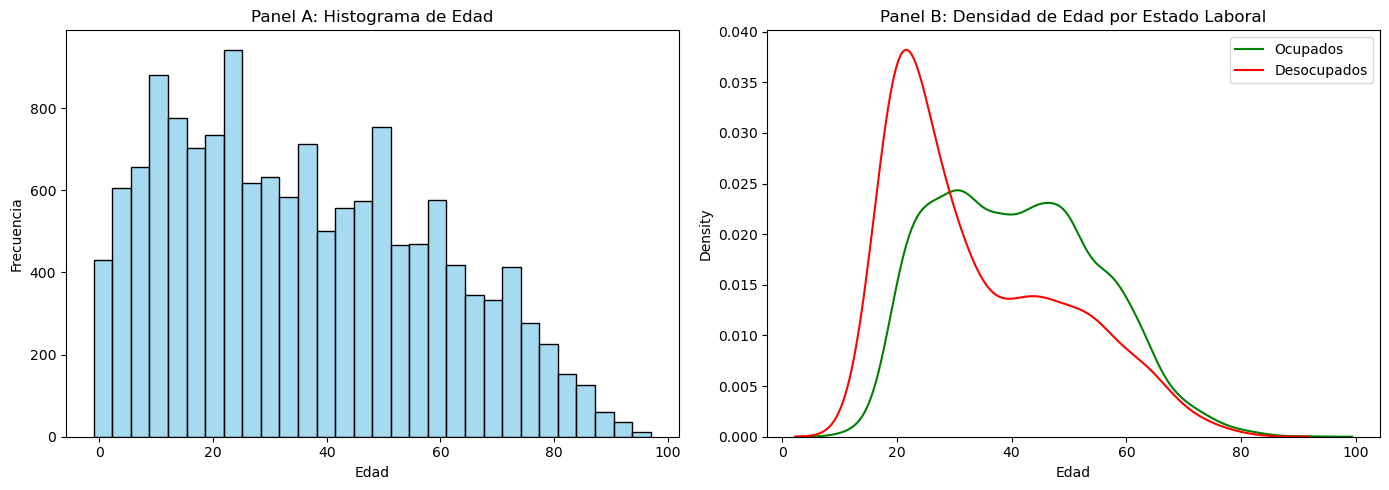

In [6]:
# Asegúrate de que CH06 esté en formato numérico
df_unido_limpio['CH06'] = pd.to_numeric(df_unido_limpio['CH06'], errors='coerce')

# 1. Crear edad2
df_unido_limpio['edad2'] = df_unido_limpio['CH06'] ** 2

# 2. Configurar el gráfico con 2 paneles
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Panel A: Histograma de la edad
sns.histplot(df_unido_limpio['CH06'], bins=30, kde=False, ax=axes[0], color='skyblue')
axes[0].set_title('Panel A: Histograma de Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Panel B: Densidad (kernel) para ocupados y desocupados
sns.kdeplot(data=df_unido_limpio[df_unido_limpio['ESTADO'] == "Ocupado"], x='CH06', label='Ocupados', ax=axes[1], fill=False, color='green')
sns.kdeplot(data=df_unido_limpio[df_unido_limpio['ESTADO'] == "Desocupado"], x='CH06', label='Desocupados', ax=axes[1], fill=False, color='red')
axes[1].set_title('Panel B: Densidad de Edad por Estado Laboral')
axes[1].set_xlabel('Edad')
axes[1].legend()

plt.tight_layout()
plt.savefig("edad2.png", bbox_inches="tight", dpi=300)
plt.show()

In [7]:
import pandas as pd
import numpy as np
from tabulate import tabulate  # Asegurate de tener instalada esta librería

# Función para calcular años de educación
def calcular_educ_total(row):
    nivel = row['CH12']
    finalizo = row['CH13']
    ch14 = row['CH14']

    # Normalizar CH13
    if isinstance(finalizo, str):
        finalizo = finalizo.strip().lower()
        if finalizo in ['sí', 'si']:
            finalizo = 1
        elif finalizo == 'no':
            finalizo = 0
        else:
            finalizo = np.nan

    # Definir niveles y años
    niveles_ordenados = [
        ("Primario", 7),
        ("EGB", 9),
        ("Secundario", 12),
        ("Polimodal", 12),
        ("Terciario", 15),
        ("Universitario", 17),
        ("Posgrado Univ.", 20)
    ]

    años_por_nivel = dict(niveles_ordenados)

    if pd.isnull(nivel) or nivel == "Jardín/ Preescolar":
        return 0

    if finalizo == 1:
        return años_por_nivel.get(nivel, np.nan)

    try:
        ch14 = int(ch14)
    except:
        ch14 = np.nan

    niveles = [n[0] for n in niveles_ordenados]
    años = [n[1] for n in niveles_ordenados]

    if nivel in niveles:
        idx = niveles.index(nivel)
        años_previos = años[idx - 1] if idx > 0 else 0
        if not np.isnan(ch14):
            total = años_previos + ch14
            return min(total, 20)  # Límite máximo de años
        else:
            return años_previos
    else:
        return np.nan

# Aplicar al DataFrame
df_unido_limpio['educ'] = df_unido_limpio.apply(calcular_educ_total, axis=1)

# Filtrar valores válidos
educ_validos = df_unido_limpio[
    (df_unido_limpio['educ'] > 0) & (df_unido_limpio['educ'] < 98)
]['educ']

# Estadísticas
descripcion = educ_validos.describe(percentiles=[0.5])
estadisticas = descripcion[['mean', 'std', 'min', '50%', 'max']]

# Renombrar índices para mayor claridad
estadisticas.index = ['Media', 'Desviación estándar', 'Mínimo', 'Mediana', 'Máximo']
tabla = estadisticas.to_frame(name='Años de Educación').T

# Mostrar como cuadro con tabulate
print(tabulate(tabla, headers='keys', tablefmt='grid', floatfmt=".2f"))
tabla.to_excel('C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Tablas/estadisticas_educacion.xlsx')

+-------------------+---------+-----------------------+----------+-----------+----------+
|                   |   Media |   Desviación estándar |   Mínimo |   Mediana |   Máximo |
+===================+=========+=======================+==========+===========+==========+
| Años de Educación |   11.03 |                  3.36 |     7.00 |     12.00 |    20.00 |
+-------------------+---------+-----------------------+----------+-----------+----------+


count    5.014000e+03
mean     1.697404e+05
std      3.556643e+05
min      5.000000e+00
25%      4.800000e+02
50%      1.300000e+03
75%      2.500000e+05
max      8.000000e+06
Name: P21, dtype: float64


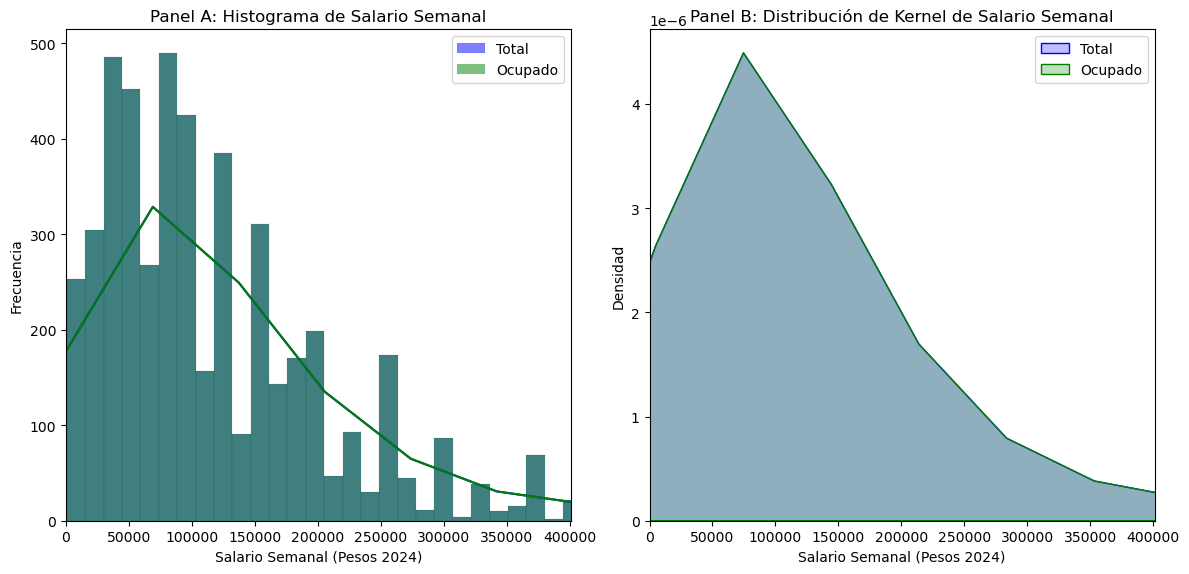

count    5014.000000
mean       41.822696
std        73.086693
min         0.000000
25%        20.000000
50%        40.000000
75%        50.000000
max      1047.000000
Name: horastrab, dtype: float64
Percentil 50 (Mediana) de horastrab: 40.0


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame 'df_unido_limpio' con las columnas 'ANO4', 'ESTADO' y 'P21' (ingresos)
# Filtrar solo los valores mayores a 0 en 'P21'
df_unido_limpio_cleaned = df_unido_limpio[df_unido_limpio['P21'] > 0].copy()  # Asegurarse de hacer una copia explícita

# Verificar las estadísticas descriptivas después de la limpieza
print(df_unido_limpio_cleaned['P21'].describe())

# Definir la tasa de inflación
inflacion = 100587.83 / 100  # 100,587.83% de inflación

# Convertir los ingresos de 2004 a 2024 usando la inflación
df_unido_limpio_cleaned.loc[:, 'Ingreso_2024'] = np.where(df_unido_limpio_cleaned['ANO4'] == 2004,
                                                           df_unido_limpio_cleaned['P21'] * (1 + inflacion), 
                                                           df_unido_limpio_cleaned['P21'])

# Asegurarse de que los ingresos en 2024 no sean negativos o muy bajos
df_unido_limpio_cleaned.loc[:, 'Ingreso_2024'] = df_unido_limpio_cleaned['Ingreso_2024'].apply(lambda x: max(x, 0))

# Calcular el salario semanal dividiendo por 40 horas a la semana
df_unido_limpio_cleaned.loc[:, 'salario_semanal'] = df_unido_limpio_cleaned['Ingreso_2024'] / 4

# Filtrar por estado (Ocupado y Desocupado)
df_unido_limpio_copy_ocupado = df_unido_limpio_cleaned[df_unido_limpio_cleaned['ESTADO'] == 'Ocupado']
df_unido_limpio_copy_desocupado = df_unido_limpio_cleaned[df_unido_limpio_cleaned['ESTADO'] == 'Desocupado']

# Crear el histograma y las distribuciones de Kernel en un panel
plt.figure(figsize=(12, 6))

# Panel A: Histograma
plt.subplot(1, 2, 1)
sns.histplot(df_unido_limpio_cleaned['salario_semanal'], kde=True, color='blue', label='Total')
sns.histplot(df_unido_limpio_copy_ocupado['salario_semanal'], kde=True, color='green', label='Ocupado')
sns.histplot(df_unido_limpio_copy_desocupado['salario_semanal'], kde=True, color='red', label='Desocupado')
plt.title('Panel A: Histograma de Salario Semanal')
plt.xlabel('Salario Semanal (Pesos 2024)')
plt.ylabel('Frecuencia')
plt.legend()

# Ajustar el límite del eje X para que se ajuste mejor al rango de salarios
plt.xlim(0, df_unido_limpio_cleaned['salario_semanal'].quantile(0.95))  # Limitar al percentil 95 para evitar valores extremos

# Panel B: Distribución de Kernel
plt.subplot(1, 2, 2)
sns.kdeplot(df_unido_limpio_cleaned['salario_semanal'], color='blue', label='Total', fill=True)
sns.kdeplot(df_unido_limpio_copy_ocupado['salario_semanal'], color='green', label='Ocupado', fill=True)
sns.kdeplot(df_unido_limpio_copy_desocupado['salario_semanal'], color='red', label='Desocupado', fill=True)
plt.title('Panel B: Distribución de Kernel de Salario Semanal')
plt.xlabel('Salario Semanal (Pesos 2024)')
plt.ylabel('Densidad')
plt.legend()

# Ajustar el límite del eje X para la distribución de Kernel
plt.xlim(0, df_unido_limpio_cleaned['salario_semanal'].quantile(0.95))  # Limitar al percentil 95

plt.tight_layout()
plt.savefig("salario_semanal.png", bbox_inches="tight", dpi=300)
plt.show()

# Crear la variable 'horastrab' como la suma de 'PP3E_TOT' (horas ocupación principal) y 'PP3F_TOT' (otras ocupaciones)
df_unido_limpio_cleaned.loc[:, 'horastrab'] = df_unido_limpio_cleaned['PP3E_TOT'] + df_unido_limpio_cleaned['PP3F_TOT']

# Estadísticas descriptivas de la variable 'horastrab'
estadisticas_horastrab = df_unido_limpio_cleaned['horastrab'].describe()

# Mostrar las estadísticas descriptivas
print(estadisticas_horastrab)

# Si deseas calcular estadísticas adicionales como el percentil 50 (mediana), también puedes hacerlo:
p50_horastrab = df_unido_limpio_cleaned['horastrab'].median()
print(f"Percentil 50 (Mediana) de horastrab: {p50_horastrab}")

In [9]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Crear la variable 'horastrab' como la suma de ocupación principal y secundaria
df_unido_limpio_cleaned['horastrab'] = df_unido_limpio['PP3E_TOT'] + df_unido_limpio['PP3F_TOT']

# Filtrar casos con más de 168 horas (una semana completa)
df_unido_limpio_cleaned = df_unido_limpio_cleaned[df_unido_limpio_cleaned['horastrab'] <= 168]

# Calcular estadísticas básicas
estadisticas_horastrab = df_unido_limpio_cleaned['horastrab'].describe()

# Seleccionar estadísticas relevantes
estadisticas = estadisticas_horastrab[['mean', 'std', 'min', '50%', 'max']]

# Convertir a DataFrame de una sola fila
tabla1 = estadisticas.to_frame().T

# Renombrar columnas para presentación
tabla1.columns = ['Media', 'Desviación estándar', 'Mínimo', 'Mediana', 'Máximo']

# Renombrar fila
tabla1.index = ['Horas trabajadas']

# Mostrar tabla con tabulate
print(tabulate(tabla1, headers='keys', tablefmt='grid', floatfmt=".2f"))

# Exportar a Excel
tabla1.to_excel('C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Tablas/horas_trabajadas.xlsx')

+------------------+---------+-----------------------+----------+-----------+----------+
|                  |   Media |   Desviación estándar |   Mínimo |   Mediana |   Máximo |
+==================+=========+=======================+==========+===========+==========+
| Horas trabajadas |   36.78 |                 21.58 |     0.00 |     40.00 |   133.00 |
+------------------+---------+-----------------------+----------+-----------+----------+


In [10]:
# Crear tabla base vacía
tabla2 = pd.DataFrame(columns=['2004', '2024', 'Total'], index=[
    'Cantidad observaciones',
    'Cantidad de observaciones con NaNs en "ESTADO"',
    'Cantidad de Ocupados',
    'Cantidad de Desocupados',
    'Cantidad de variables limpias y homogeneizadas'
])

# Completar la tabla con conteos por año
for year in [2004, 2024]:
    df_year = df_unido_limpio[df_unido_limpio['ANO4'] == year]

    tabla2.loc['Cantidad observaciones', str(year)] = df_year.shape[0]
    tabla2.loc['Cantidad de observaciones con NaNs en "ESTADO"', str(year)] = df_year['ESTADO'].isna().sum()
    tabla2.loc['Cantidad de Ocupados', str(year)] = (df_year['ESTADO'] == 'Ocupado').sum()
    tabla2.loc['Cantidad de Desocupados', str(year)] = (df_year['ESTADO'] == 'Desocupado').sum()

# Totales generales por fila
tabla2['Total'] = tabla2[['2004', '2024']].astype(float).sum(axis=1)

# Asumimos que todas las columnas de df_unido_limpio_cleaned están limpias
columnas_utiles = df_unido_limpio_cleaned.columns
tabla2.loc['Cantidad de variables limpias y homogeneizadas', :] = [len(columnas_utiles)] * 3

# Convertir todo a int si es posible
tabla2 = tabla2.astype(int)

# Mostrar la tabla con tabulate
print(tabulate(tabla2, headers='keys', tablefmt='grid', stralign='center', numalign='center'))
tabla2.to_excel('C:/Users/Toba/FCE/Big Data/Github/BigDataUBA-Grupo28/TP/TP3/Tablas/observaciones.xlsx')

+------------------------------------------------+--------+--------+---------+
|                                                |  2004  |  2024  |  Total  |
+================================================+========+========+=========+
|             Cantidad observaciones             |  7647  |  7051  |  14698  |
+------------------------------------------------+--------+--------+---------+
| Cantidad de observaciones con NaNs en "ESTADO" |   0    |   0    |    0    |
+------------------------------------------------+--------+--------+---------+
|              Cantidad de Ocupados              |  3079  |  3224  |  6303   |
+------------------------------------------------+--------+--------+---------+
|            Cantidad de Desocupados             |  528   |  311   |   839   |
+------------------------------------------------+--------+--------+---------+
| Cantidad de variables limpias y homogeneizadas |  187   |  187   |   187   |
+------------------------------------------------+--

                     CH06     edad2      educ  salario_semanal  horastrab
CH06             1.000000  0.984220 -0.128230         0.070133  -0.049027
edad2            0.984220  1.000000 -0.133342         0.054836  -0.056962
educ            -0.128230 -0.133342  1.000000         0.174005  -0.052993
salario_semanal  0.070133  0.054836  0.174005         1.000000   0.133676
horastrab       -0.049027 -0.056962 -0.052993         0.133676   1.000000


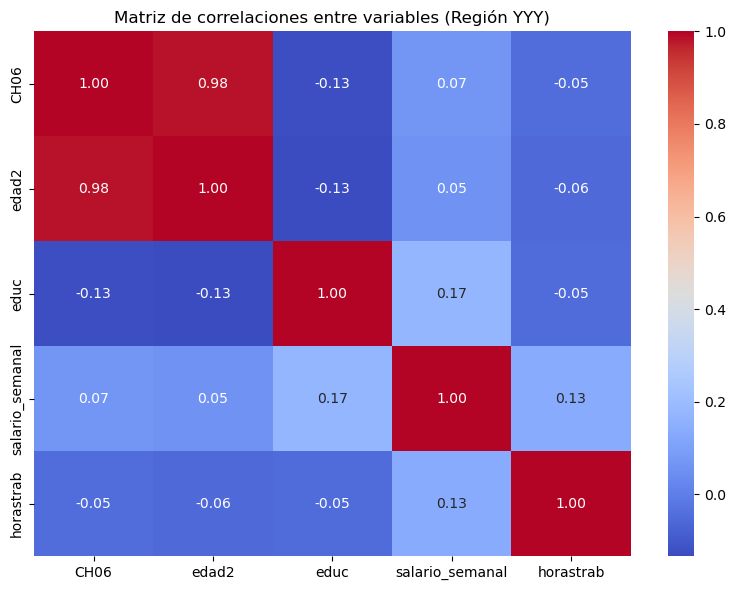

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables de interés
variables_interes = ['CH06', 'edad2', 'educ', 'salario_semanal', 'horastrab']
df_corr = df_unido_limpio_cleaned[variables_interes].dropna()

# Calcular la matriz de correlaciones
matriz_correlaciones = df_corr.corr()

# Mostrar la matriz como tabla
print(matriz_correlaciones)

# Visualización con mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlaciones entre variables (Región YYY)')
plt.tight_layout()
plt.savefig("matriz_correlacion.png", bbox_inches="tight", dpi=300)
plt.show()

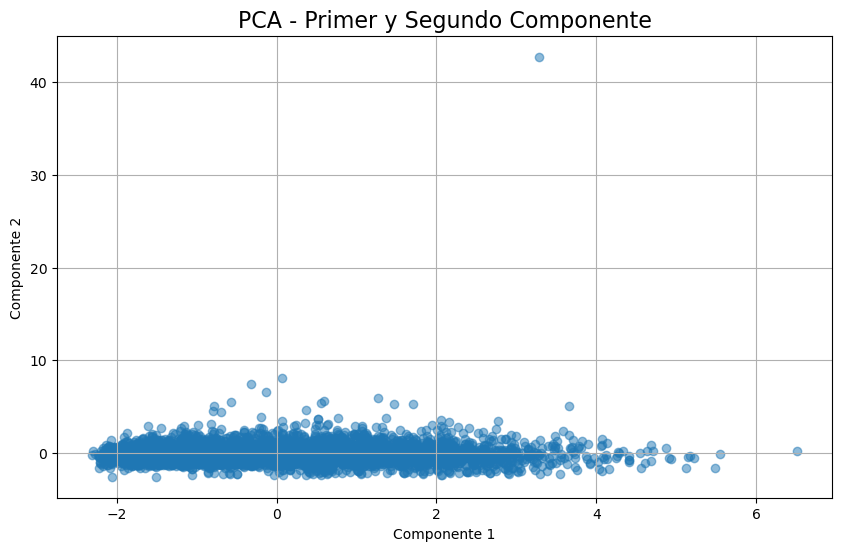

Varianza explicada por cada componente principal:
[0.40485029 0.23825955]
   Componente 1  Componente 2
0      1.501284      1.050327
1     -1.581878     -0.633268
2     -1.854653     -0.922115
3      1.365993      0.688941
4      0.641622      0.993536


In [12]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionar las 5 variables que vamos a usar para PCA
variables = ['CH06', 'edad2', 'educ', 'salario_semanal', 'horastrab']

# Asegurarse de que todas las variables existen en el DataFrame
df_selected = df_unido_limpio_cleaned[variables]

# Eliminar cualquier fila con valores nulos en las variables seleccionadas
df_selected = df_selected.dropna()

# Estandarizar las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Aplicar PCA (queremos los primeros dos componentes principales)
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(df_scaled)

# Crear un DataFrame con los resultados de los componentes principales
pca_df = pd.DataFrame(data=pca_scores, columns=['Componente 1', 'Componente 2'])

# Gráfico de dispersión de los primeros dos componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Componente 1'], pca_df['Componente 2'], alpha=0.5)
plt.title('PCA - Primer y Segundo Componente', fontsize=16)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.savefig("PCA.png", bbox_inches="tight", dpi=300)
plt.show()

# Explicar la varianza de cada componente principal
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

# Cargar los componentes principales en el DataFrame
pca_df['Componente 1'] = pca_df['Componente 1']
pca_df['Componente 2'] = pca_df['Componente 2']

# Mostrar las primeras filas del DataFrame de PCA
print(pca_df.head())

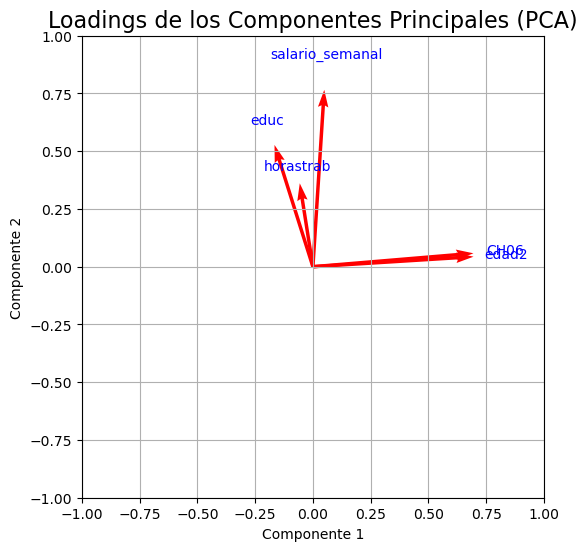

                 Componente 1  Componente 2
CH06                 0.695098      0.058109
edad2                0.695372      0.043414
educ                -0.166253      0.527221
salario_semanal      0.049150      0.765710
horastrab           -0.056928      0.361199


In [13]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionar las 5 variables que vamos a usar para PCA
variables = ['CH06', 'edad2', 'educ', 'salario_semanal', 'horastrab']

# Asegurarse de que todas las variables existen en el DataFrame
df_selected = df_unido_limpio_cleaned[variables]

# Eliminar cualquier fila con valores nulos en las variables seleccionadas
df_selected = df_selected.dropna()

# Estandarizar las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Aplicar PCA (queremos los primeros dos componentes principales)
pca = PCA(n_components=2)
pca.fit(df_scaled)

# Obtener los loadings (ponderadores)
loadings = pca.components_.T  # Transponer para obtener un formato más conveniente

# Crear un gráfico para visualizar los loadings
plt.figure(figsize=(10, 6))
plt.quiver(np.zeros(len(variables)), np.zeros(len(variables)), loadings[:, 0], loadings[:, 1], angles='xy', scale_units='xy', scale=1, color='r')

# Etiquetas de las variables
for i, var in enumerate(variables):
    plt.text(loadings[i, 0] * 1.2, loadings[i, 1] * 1.2, var, color='blue', ha='center', va='center')

# Ajustar límites del gráfico para mejor visualización
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('Loadings de los Componentes Principales (PCA)', fontsize=16)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("PCA_flechas.png", bbox_inches="tight", dpi=300)
plt.show()

# Mostrar los loadings (ponderadores) de las variables
loadings_df = pd.DataFrame(loadings, index=variables, columns=['Componente 1', 'Componente 2'])
print(loadings_df)

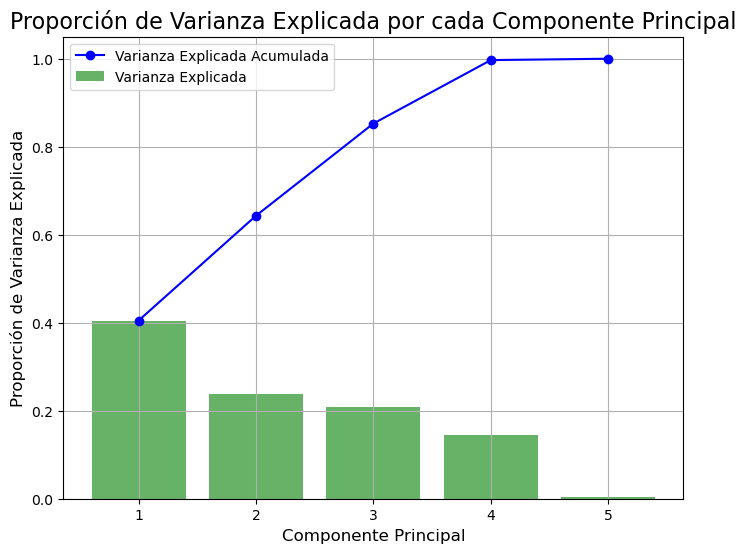

Varianza explicada por cada componente: [0.40485029 0.23825955 0.20959356 0.14416872 0.00312788]


In [14]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seleccionar las 5 variables que vamos a usar para PCA
variables = ['CH06', 'edad2', 'educ', 'salario_semanal', 'horastrab']

# Asegurarse de que todas las variables existen en el DataFrame
df_selected = df_unido_limpio_cleaned[variables]

# Eliminar cualquier fila con valores nulos en las variables seleccionadas
df_selected = df_selected.dropna()

# Estandarizar las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Aplicar PCA (queremos los primeros 2 componentes principales)
pca = PCA(n_components=5)  # Ajustar a 5 para considerar todos los componentes
pca.fit(df_scaled)

# Obtener la varianza explicada
explained_variance_ratio = pca.explained_variance_ratio_

# Graficar la varianza explicada por cada componente
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, color='g', label='Varianza Explicada')
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', color='b', label='Varianza Explicada Acumulada')

# Etiquetas y título
plt.title('Proporción de Varianza Explicada por cada Componente Principal', fontsize=16)
plt.xlabel('Componente Principal', fontsize=12)
plt.ylabel('Proporción de Varianza Explicada', fontsize=12)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig("Varianza.png", bbox_inches="tight", dpi=300)
plt.show()

# Mostrar la varianza explicada por cada componente
print("Varianza explicada por cada componente:", explained_variance_ratio)

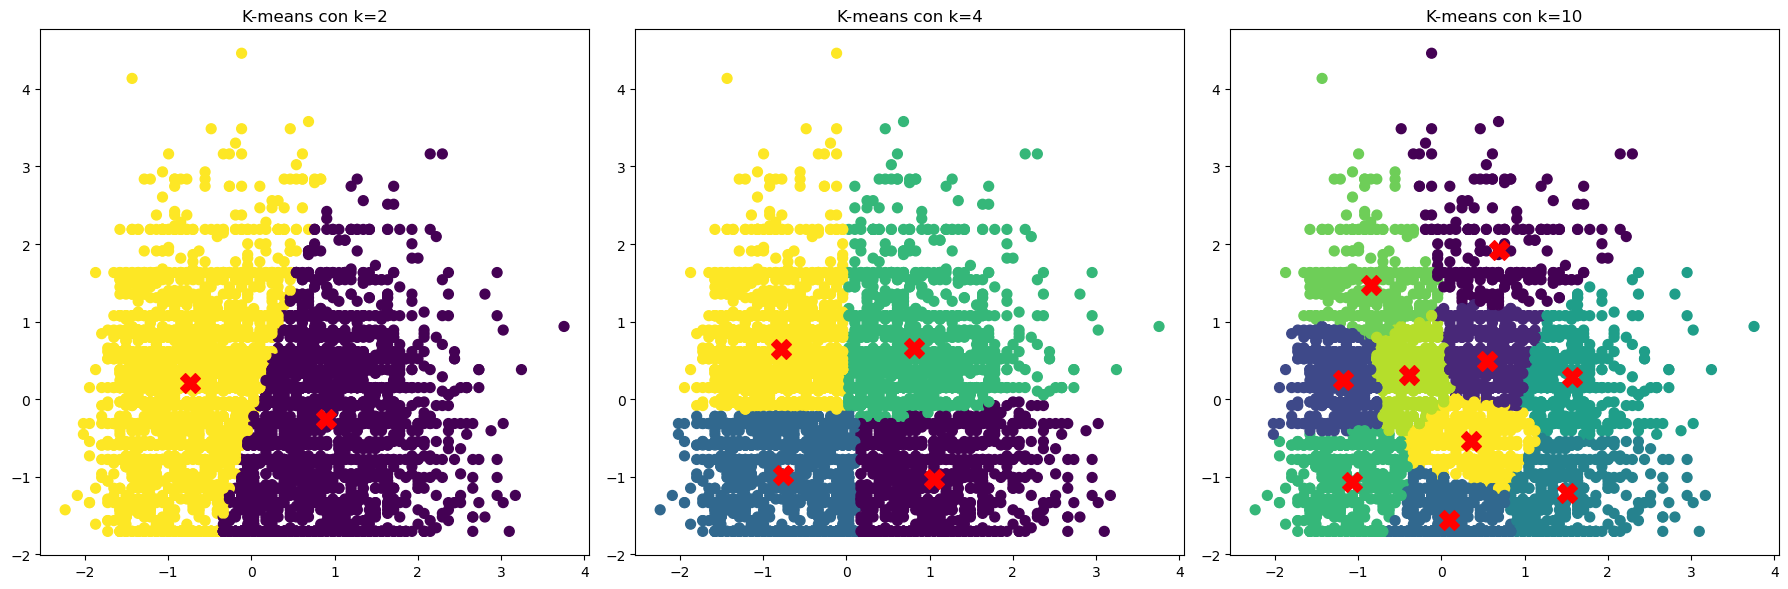

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar dos predictores
# Asegúrate de reemplazar 'predictor_1' y 'predictor_2' con los nombres reales de tus columnas
cols = ['CH06', 'horastrab']
X =  df_unido_limpio_cleaned[cols].dropna().values

# Estandarizar los datos para que todos los predictores tengan la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Valores de k a probar
k_values = [2, 4, 10]

# Crear una figura para las gráficas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Ejecutar el algoritmo K-means y graficar los resultados para cada k
for ax, k in zip(axes, k_values):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(X_scaled)
    y_kmeans = kmeans.predict(X_scaled)
    
    # Graficar
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')  # Centroides
    ax.set_title(f'K-means con k={k}')
    
plt.tight_layout()
plt.savefig("Cluster_K2_K4_K10.png", bbox_inches="tight", dpi=300)
plt.show()

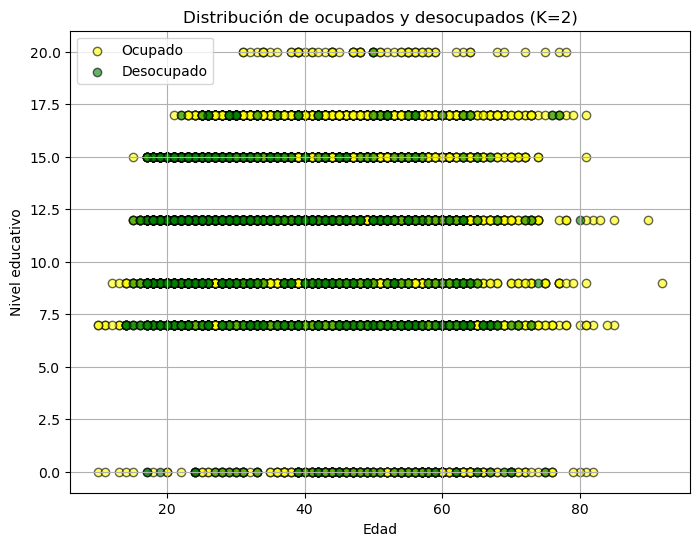

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Filtrar las filas sin valores nulos
df_cluster = df_unido_limpio[['CH06', 'educ', 'ESTADO']].dropna()

# Variables para clustering
X = df_cluster[['CH06', 'educ']].values

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means con k=2
kmeans = KMeans(n_clusters=2, n_init=20, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Agregar los resultados al DataFrame
df_cluster['cluster'] = labels
df_cluster['ocupacion'] = df_cluster['ESTADO']

# Gráfico con colores modificados
colors_ocupacion = {'Ocupado': 'yellow', 'Desocupado': 'green'}  # Amarillo y verde

plt.figure(figsize=(8, 6))
for estado, color in colors_ocupacion.items():
    subset = df_cluster[df_cluster['ocupacion'] == estado]
    plt.scatter(
        subset['CH06'], subset['educ'],
        c=color, label=estado, alpha=0.6,
        edgecolor='k'
    )

plt.xlabel('Edad')
plt.ylabel('Nivel educativo')
plt.title('Distribución de ocupados y desocupados (K=2)')
plt.legend()
plt.grid(True)
plt.savefig("Cluster_K2.png", bbox_inches="tight", dpi=300)
plt.show()

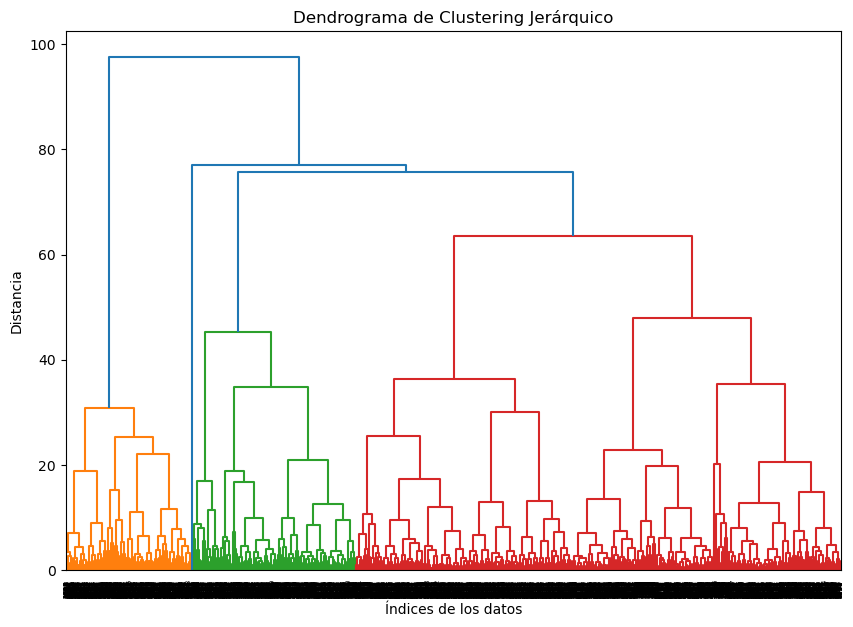

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Filtrar las filas sin valores nulos y seleccionar las variables necesarias
df_cluster_jerarquico = df_unido_limpio_cleaned[['CH06', 'edad2', 'educ', 'salario_semanal', 'horastrab']].dropna()

# Variables para clustering jerárquico
X = df_cluster_jerarquico[['CH06', 'edad2', 'educ', 'salario_semanal', 'horastrab']].values

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular la matriz de distancias y aplicar el método de linkage
Z = linkage(X_scaled, method='ward')

# Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índices de los datos')
plt.ylabel('Distancia')
plt.savefig("Dendograma.png", bbox_inches="tight", dpi=300)
plt.show()